# 📘 DeepSeek-OCR Baseline Inference

## 1. Installation

In [ ]:
# 1. Cài đặt Unsloth & Dependencies
!pip install --no-deps bitsandbytes accelerate xformers peft trl triton cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" "hf_transfer"
!pip install --no-deps unsloth

# 2. Cài đặt Transformers & TRL đúng version yêu cầu
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2

# 3. Thư viện hỗ trợ
!pip install jiwer einops addict easydict torchvision

In [1]:
# 1. Cài đặt các thư viện lõi (Core libraries)
import os, sys

# Thiết lập biến môi trường để Unsloth chạy mượt mà
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'

## 2. Load Model & LoRA config

In [3]:
import torch
from unsloth import FastVisionModel
from transformers import AutoModel
from huggingface_hub import snapshot_download

# 1. Tải model về thư mục local "deepseek_ocr"
print("⬇️ Đang tải model DeepSeek-OCR...")
snapshot_download("unsloth/DeepSeek-OCR", local_dir = "deepseek_ocr")

# 2. Load Model từ thư mục local
# Sử dụng load_in_4bit=True cho GPU T4
model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr",
    load_in_4bit = True, 
    auto_model = AutoModel,
    trust_remote_code = True,
    unsloth_force_compile = True,
    use_gradient_checkpointing = "unsloth", 
)

# 3. Gắn LoRA Adapters
model = FastVisionModel.get_peft_model(
    model,
    target_modules=[
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ],
    r = 16,
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None, 
)

print("✅ Load model thành công!")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-12-02 07:29:25.177456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764660565.381174      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764660565.444561      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[xformers|WARNING]WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.0+cu128 with CUDA 1208 (you have 2.6.0+cu124)
    Python  3.10.19 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


Switching to PyTorch attention since your Xformers is broken.

Unsloth: Xformers was not installed correctly.
Please install xformers separately first.
Then confirm if it's correctly installed by running:
python -m xformers.info

Longer error message:
xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.0+cu128 with CUDA 1208 (you have 2.6.0+cu124)
    Python  3.10.19 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: Could not import trl.trainer.alignprop_trainer: Failed to import trl.trainer.alignprop_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable

.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.11.6: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Unsloth: Making `model.base_model.model.model` require gradients
✅ Load model thành công!


## 3. Inference

In [11]:
import json
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Tạo thư mục output để tránh lỗi "No such 
OUTPUT_DIR = "/kaggle/working/output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def run_baseline_check(jsonl_path, num_samples=3):
    print(f"📂 Đang đọc dữ liệu từ: {jsonl_path}")
    
    if not os.path.exists(jsonl_path):
        print(f"❌ Không tìm thấy file: {jsonl_path}")
        return

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    if not lines:
        print("❌ File rỗng!")
        return

    # Lấy mẫu ngẫu nhiên
    samples = random.sample(lines, min(len(lines), num_samples))

    # Instruction mặc định của DeepSeek-OCR
    instruction = "<image>\nFree OCR. "
    
    for i, line in enumerate(samples):
        data = json.loads(line)
        img_path = data["image"]
        # get name of mother folder of img_path
        img_folder = os.path.basename(os.path.dirname(img_path))
        # get name of img_path
        img_name = os.path.basename(img_path)
        ground_truth = data["text"]
        
        print(f"\n{'='*20} Mẫu thử #{i+1} {'='*20}")
        print(f"📁 Thư mục ảnh: {img_folder}, Tên ảnh: {img_name}")
        try:
            # 1. Hiển thị ảnh
            if os.path.exists(img_path):
                image_preview = Image.open(img_path).convert("RGB")
                plt.figure(figsize=(10, 2))
                plt.imshow(image_preview)
                plt.axis('off')
                plt.show()
            else:
                print(f"⚠️ Không tìm thấy file ảnh: {img_path}")
                continue

            # 2. Chạy Inference
            res = model.infer(
                tokenizer, 
                prompt=instruction, 
                image_file=img_path,       
                output_path=OUTPUT_DIR + f"/{img_folder}/{img_name}",    
                base_size=1024, 
                image_size=640, 
                crop_mode=True, 
                save_results=True,         
                test_compress=False
            )
            
            # Xử lý kết quả trả về
            # pred_text đọc từ output_path/result.mmd
            pred_text = ""
            with open(OUTPUT_DIR + f"/{img_folder}/{img_name}/result.mmd", 'r', encoding='utf-8') as f:
                pred_text = f.read().strip()
            
            print(f"📝 Ground Truth: {ground_truth}")
            print(f"🤖 Prediction  : {pred_text}")
            
        except Exception as e:
            print(f"❌ Lỗi: {e}")

print("✅ Đã chuẩn bị hàm Inference")

✅ Đã chuẩn bị hàm Inference


📂 Đang đọc dữ liệu từ: /kaggle/input/uit-hwdb/test_line.jsonl

==================== Mẫu thử #1 ====================
📁 Thư mục ảnh: 250, Tên ảnh: 35.jpg


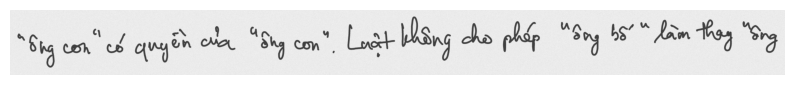

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
"Gìng còn" có quyển của "Gìng còn". Lượt không đảo pháp "ông bà" làm thay "ông
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

📝 Ground Truth: " ông con " có quyền của " ông con ". Luật không cho phép " ông bố " làm thay " ông
🤖 Prediction  : "Gìng còn" có quyển của "Gìng còn". Lượt không đảo pháp "ông bà" làm thay "ông

==================== Mẫu thử #2 ====================
📁 Thư mục ảnh: 255, Tên ảnh: 9.jpg


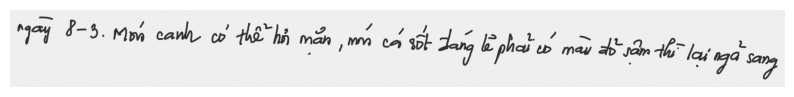

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ngay 8-3. Mời cạnh cơ thế như màn, mời cốt sát đang lệ phạt có mưu ác sẵn như lời ngã sang
===============save results:===============


image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

📝 Ground Truth: ngày 8 - 3. Món canh có thể hơi mặn, món cá sốt đáng lẽ phải có màu đỏ sậm thì lại ngả sang
🤖 Prediction  : ngay 8-3. Mời cạnh cơ thế như màn, mời cốt sát đang lệ phạt có mưu ác sẵn như lời ngã sang


In [12]:
# Đường dẫn tới file JSONL được convert trước đó
TEST_JSONL = "/kaggle/input/uit-hwdb/test_line.jsonl" 

if os.path.exists(TEST_JSONL):
    run_baseline_check(TEST_JSONL, num_samples=2)
else:
    print(f"⚠️ Không tìm thấy file {TEST_JSONL}")